In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import scipy.stats as stats
import seaborn as sns


# Models of causal exposure and identification criteria for conditioning estimators

## Illustration of collider variables

In [4]:
# SAT scores and individual motivation are uncorrelated in the population
SAT = np.random.normal(loc=1, scale=1, size=250)
motivation = np.random.normal(loc=1, scale=1, size=250)

# Both toghether determine college admission
score = SAT + motivation
cutoff = np.percentile(score, 85)
is_admitted = score > cutoff

# For further processing we create a data frame.
data = np.array([SAT, motivation, is_admitted]).T
columns = ['SAT', 'motivation', 'admission']
df = pd.DataFrame(data=data, columns=columns)
df.head()

,SAT,motivation,admission
0,0.909803,0.551164,0.0
1,2.170304,1.709275,1.0
2,1.455806,2.348319,1.0
3,0.198449,2.380062,0.0
4,1.390719,-0.253268,0.0


The Pearson correlation coefficient is  -0.008


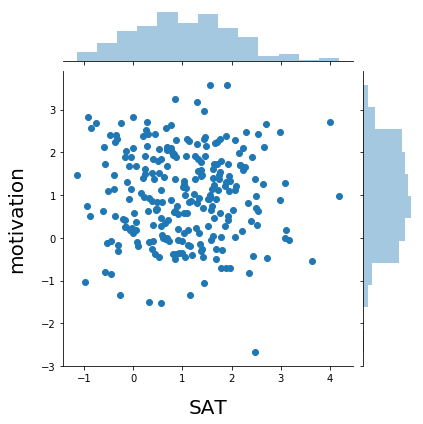

In [5]:
sns.jointplot('SAT', 'motivation', df);
print('The Pearson correlation coefficient is {:7.3f}'.format(stats.pearsonr(df['SAT'], df['motivation'])[0]))

What happens if we conidition on college admittance $C$, i.e. on a collider variable?

The Pearson correlation coefficient is  -0.483


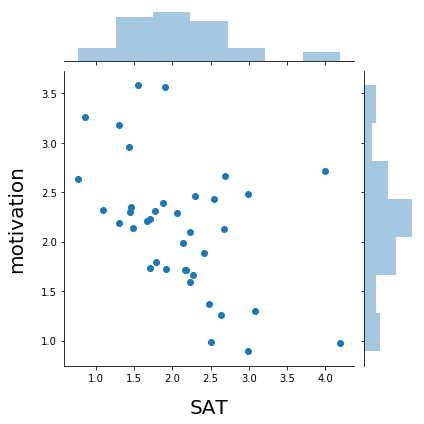

In [6]:
df_admitted = df[is_admitted]
sns.jointplot('SAT', 'motivation', df_admitted);
print('The Pearson correlation coefficient is {:7.3f}'.format(stats.pearsonr(df_admitted['SAT'], df_admitted['motivation'])[0]))